<a href="https://colab.research.google.com/github/JaiminVadadoriya/Movie-Recommendation-System-Using-Supervised-Learning/blob/main/Movie_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Movie Recommendation System Using Supervised Learning
Build a binary classifier to predict whether a user would rate a movie positively (rating ≥ 4) using historical user-movie rating data.

##  Movie Recommendation System (Binary Classifier)
Build a binary classifier to predict whether a user would rate a movie positively (rating ≥ 4) using historical user-movie rating data.

### Using Supervised Learning - Logistic Regression

#### Step 1: Install Required Packages

In [2]:
!pip install scikit-learn pandas matplotlib seaborn

#### Step 2: Import Libraries

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

#### Step 3: Load MovieLens Dataset (100k)

In [4]:
url = 'https://files.grouplens.org/datasets/movielens/ml-100k/u.data'
column_names = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_csv(url, sep='\t', names=column_names)

print("First few rows of the dataset:")
print(ratings.head())

First few rows of the dataset:
   user_id  movie_id  rating  timestamp
0      196       242       3  881250949
1      186       302       3  891717742
2       22       377       1  878887116
3      244        51       2  880606923
4      166       346       1  886397596


#### Step 4: Convert ratings to binary labels (1 if rating >= 4, else 0)

In [5]:
ratings['label'] = ratings['rating'].apply(lambda x: 1 if x >= 4 else 0)

#### Step 5: Prepare features


We'll use user_id and movie_id as simple features

In [6]:
features = ratings[['user_id', 'movie_id']].copy()
labels = ratings['label']

Encode user_id and movie_id (very simple encoding for demo)

In [7]:
from sklearn.preprocessing import LabelEncoder
user_encoder = LabelEncoder()
movie_encoder = LabelEncoder()

features['user_id'] = user_encoder.fit_transform(features['user_id'])
features['movie_id'] = movie_encoder.fit_transform(features['movie_id'])

#### Step 6: Train/Test Split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)


#### Step 7: Train Logistic Regression Model


In [9]:
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

#### Step 8: Make Predictions

In [10]:
y_pred = model.predict(X_test)

#### Step 9: Evaluate the Model


Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.32      0.42      9010
           1       0.60      0.82      0.69     10990

    accuracy                           0.60     20000
   macro avg       0.60      0.57      0.55     20000
weighted avg       0.60      0.60      0.57     20000

Confusion Matrix:


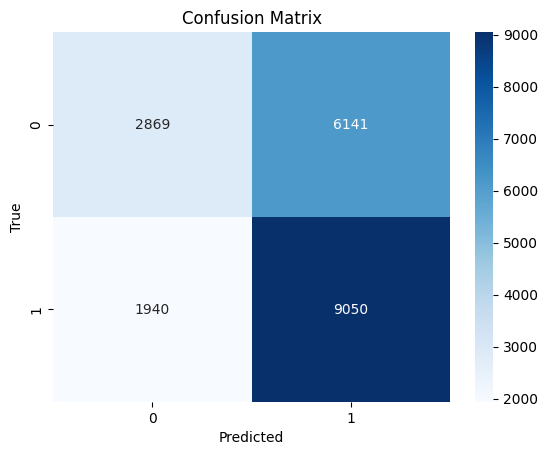

Accuracy Score: 0.59595


In [11]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

print("Accuracy Score:", accuracy_score(y_test, y_pred))

## simple feedforward neural network


###  Step 1: Install and Import Packages


In [12]:
!pip install pandas scikit-learn matplotlib seaborn torch

import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 31.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 37.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 29.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 75.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

### Step 2: Load Dataset

In [23]:
url = 'https://files.grouplens.org/datasets/movielens/ml-100k/u.data'
column_names = ['user_id', 'movie_id', 'rating', 'timestamp']
df = pd.read_csv(url, sep='\t', names=column_names)

Binary label: 1 if rating >= 4, else 0


In [24]:
df['label'] = df['rating'].apply(lambda x: 1 if x >= 4 else 0)

### Step 3: Encode IDs

In [25]:
df = df[['user_id', 'movie_id', 'label']].copy()
user_encoder = LabelEncoder()
movie_encoder = LabelEncoder()

df['user_id_enc'] = user_encoder.fit_transform(df['user_id'])
df['movie_id_enc'] = movie_encoder.fit_transform(df['movie_id'])

num_users = df['user_id_enc'].nunique()
num_movies = df['movie_id_enc'].nunique()


###  Step 4: Create PyTorch Dataset

In [26]:
class MovieDataset(Dataset):
    def __init__(self, user_ids, movie_ids, labels):
        self.user_ids = torch.tensor(user_ids, dtype=torch.long)
        self.movie_ids = torch.tensor(movie_ids, dtype=torch.long)
        self.labels = torch.tensor(labels, dtype=torch.float32)

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return self.user_ids[idx], self.movie_ids[idx], self.labels[idx]

Split data

In [27]:
X_train, X_test = train_test_split(df, test_size=0.2, random_state=42)

train_dataset = MovieDataset(
    X_train['user_id_enc'].values,
    X_train['movie_id_enc'].values,
    X_train['label'].values
)

test_dataset = MovieDataset(
    X_test['user_id_enc'].values,
    X_test['movie_id_enc'].values,
    X_test['label'].values
)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64)


###  Step 5: Define Model with Embeddings


In [28]:
class RecommenderNet(nn.Module):
    def __init__(self, num_users, num_movies, embedding_size=50):
        super().__init__()
        self.user_embedding = nn.Embedding(num_users, embedding_size)
        self.movie_embedding = nn.Embedding(num_movies, embedding_size)
        self.fc1 = nn.Linear(embedding_size * 2, 128)
        self.dropout = nn.Dropout(0.3)
        self.fc2 = nn.Linear(128, 1)

        nn.init.xavier_uniform_(self.fc1.weight)
        nn.init.xavier_uniform_(self.fc2.weight)

    def forward(self, user_id, movie_id):
        user_vec = self.user_embedding(user_id)
        movie_vec = self.movie_embedding(movie_id)
        x = torch.cat([user_vec, movie_vec], dim=1)
        x = self.dropout(torch.relu(self.fc1(x)))
        x = self.fc2(x)
        return x.squeeze()


###  Step 6: Train the Model



In [29]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = RecommenderNet(num_users, num_movies).to(device)

loss_fn = nn.BCEWithLogitsLoss()

optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
# optimizer = torch.optim.SGD(model.parameters(), lr=0.1, momentum=0.9)

epochs = 10
for epoch in range(epochs):
    model.train()
    total_loss = 0
    for user_ids, movie_ids, labels in train_loader:
        user_ids, movie_ids, labels = user_ids.to(device), movie_ids.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(user_ids, movie_ids)
        loss = loss_fn(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    print(f"Epoch {epoch+1}/{epochs} | Total Loss: {total_loss:.4f}")


Epoch 1/10 | Total Loss: 837.1991
Epoch 2/10 | Total Loss: 757.2444
Epoch 3/10 | Total Loss: 719.5182
Epoch 4/10 | Total Loss: 700.2680
Epoch 5/10 | Total Loss: 686.3552
Epoch 6/10 | Total Loss: 677.1537
Epoch 7/10 | Total Loss: 669.8111
Epoch 8/10 | Total Loss: 663.7514
Epoch 9/10 | Total Loss: 656.6444
Epoch 10/10 | Total Loss: 649.9833


###  Step 7: Evaluate the Model

In [30]:
model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for user_ids, movie_ids, labels in test_loader:
        user_ids, movie_ids = user_ids.to(device), movie_ids.to(device)
        outputs = model(user_ids, movie_ids)
        preds = torch.sigmoid(outputs).cpu() >= 0.5
        all_preds.extend(preds.tolist())
        all_labels.extend(labels.tolist())

print("\nClassification Report:")
print(classification_report(all_labels, all_preds))
print("Accuracy:", accuracy_score(all_labels, all_preds))



Classification Report:
              precision    recall  f1-score   support

         0.0       0.70      0.59      0.64      9010
         1.0       0.70      0.79      0.75     10990

    accuracy                           0.70     20000
   macro avg       0.70      0.69      0.69     20000
weighted avg       0.70      0.70      0.70     20000

Accuracy: 0.70355


###  Step 8: Visualize Results


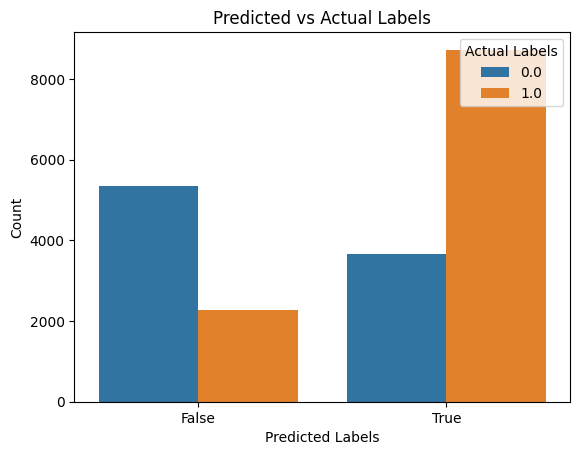

In [31]:
sns.countplot(x=all_preds, hue=all_labels)
plt.title('Predicted vs Actual Labels')
plt.xlabel('Predicted Labels')
plt.ylabel('Count')
plt.legend(title='Actual Labels', loc='upper right')
plt.show()


###  Step 9: Save the Model


In [32]:
# torch.save(model.state_dict(), 'recommender_model.pth')
